#Лабораторная 5

# Установка


In [ ]:
!pip install pycaret

In [ ]:
!pip install catboost

#Задание №1.

## A. Реализовать DecisionTreeClassifier и DecisionTreeRegressor из Sclearn для соответствующих наборов данных своего варианта. Осуществить настройку гиперпараметров. Выполнить оценку качества модели, визуализировать дерево решений, вывести решающие правила. Сравнить полученные результаты обучения моделей с данными, полученными с помощью PyCaret (открытая low-code библиотека ML на Python, см. Lab5_Ex3 DRs_classifier.ipynb)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

def metrics_c(actual, pred):
  return {
    'Accuracy': accuracy_score(actual, pred),
    'Precision': precision_score(actual, pred),
    'Recall': recall_score(actual, pred),
    'F1-score': f1_score(actual, pred),
    'ROC_AUC': roc_auc_score(actual, pred)
  }
models_c = {}

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from math import sqrt

def metrics_r(actual, pred):
  return {
    'MAE': mean_absolute_error(actual, pred),
    'MSE': mean_squared_error(actual, pred),
    'RMSE': sqrt(mean_squared_error(actual, pred)),
    'MAPE': mean_absolute_percentage_error(actual, pred),
    'R^2': r2_score(actual, pred)
  }
models_r = {}

In [ ]:
def best_model(models, metrics):
    return max([(val[metrics], k) for k, val in models.items()])

In [ ]:
datar = pd.read_csv("my_diamonds.csv", sep=';') # Лаба 3  my_diamonds
datar.drop(['Unnamed: 0'], axis=1, inplace=True)
yr = datar['price']
Xr = datar.drop(['price'], axis=1)

In [ ]:
datac = pd.read_csv('my_card_transdata.csv', sep=';')  # Лаба 4   my_card_transdata
datac.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137462 entries, 0 to 137461
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              137462 non-null  float64
 1   distance_from_last_transaction  137462 non-null  float64
 2   ratio_to_median_purchase_price  137462 non-null  float64
 3   repeat_retailer                 137462 non-null  bool   
 4   used_chip                       137462 non-null  bool   
 5   used_pin_number                 137462 non-null  bool   
 6   online_order                    137462 non-null  bool   
 7   fraud                           137462 non-null  bool   
dtypes: bool(5), float64(3)
memory usage: 3.8 MB


In [ ]:
def ch_type(replace):
  for row in replace:
      datac[replace] = datac[replace].astype(int)

list_replace =['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']

ch_type(list_replace)

In [ ]:
datac.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

yc = datac['fraud']
Xc = datac.drop(['fraud'], axis=1)

smt = SMOTE()
Xc, yc = smt.fit_resample(Xc, yc)

In [ ]:
yc

0         0
1         0
2         0
3         0
4         0
         ..
250997    1
250998    1
250999    1
251000    1
251001    1
Name: fraud, Length: 251002, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
Xc_train = mm_scaler.fit_transform(Xc_train)
Xc_test = mm_scaler.transform(Xc_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from matplotlib import pyplot as plt

In [ ]:
parameters = {'criterion': ('gini', 'entropy', 'log_loss')}
optimal = GridSearchCV(DecisionTreeClassifier(max_depth=3), parameters).fit(Xc_train, yc_train)
# выводим оптимальные значения параметров
criterion = optimal.best_params_['criterion']

criterion

'entropy'

In [ ]:
DTC = DecisionTreeClassifier(criterion=criterion, max_depth=3).fit(Xc_train, yc_train)
yc_pred = DTC.predict(Xc_test)

print(tree.export_text(DTC))

|--- feature_2 <= 0.01
|   |--- feature_0 <= 0.02
|   |   |--- feature_1 <= 0.02
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.02
|   |   |   |--- class: 1
|   |--- feature_0 >  0.02
|   |   |--- feature_4 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_4 >  0.50
|   |   |   |--- class: 0
|--- feature_2 >  0.01
|   |--- feature_6 <= 0.50
|   |   |--- feature_0 <= 0.02
|   |   |   |--- class: 0
|   |   |--- feature_0 >  0.02
|   |   |   |--- class: 1
|   |--- feature_6 >  0.50
|   |   |--- feature_5 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_5 >  0.50
|   |   |   |--- class: 0



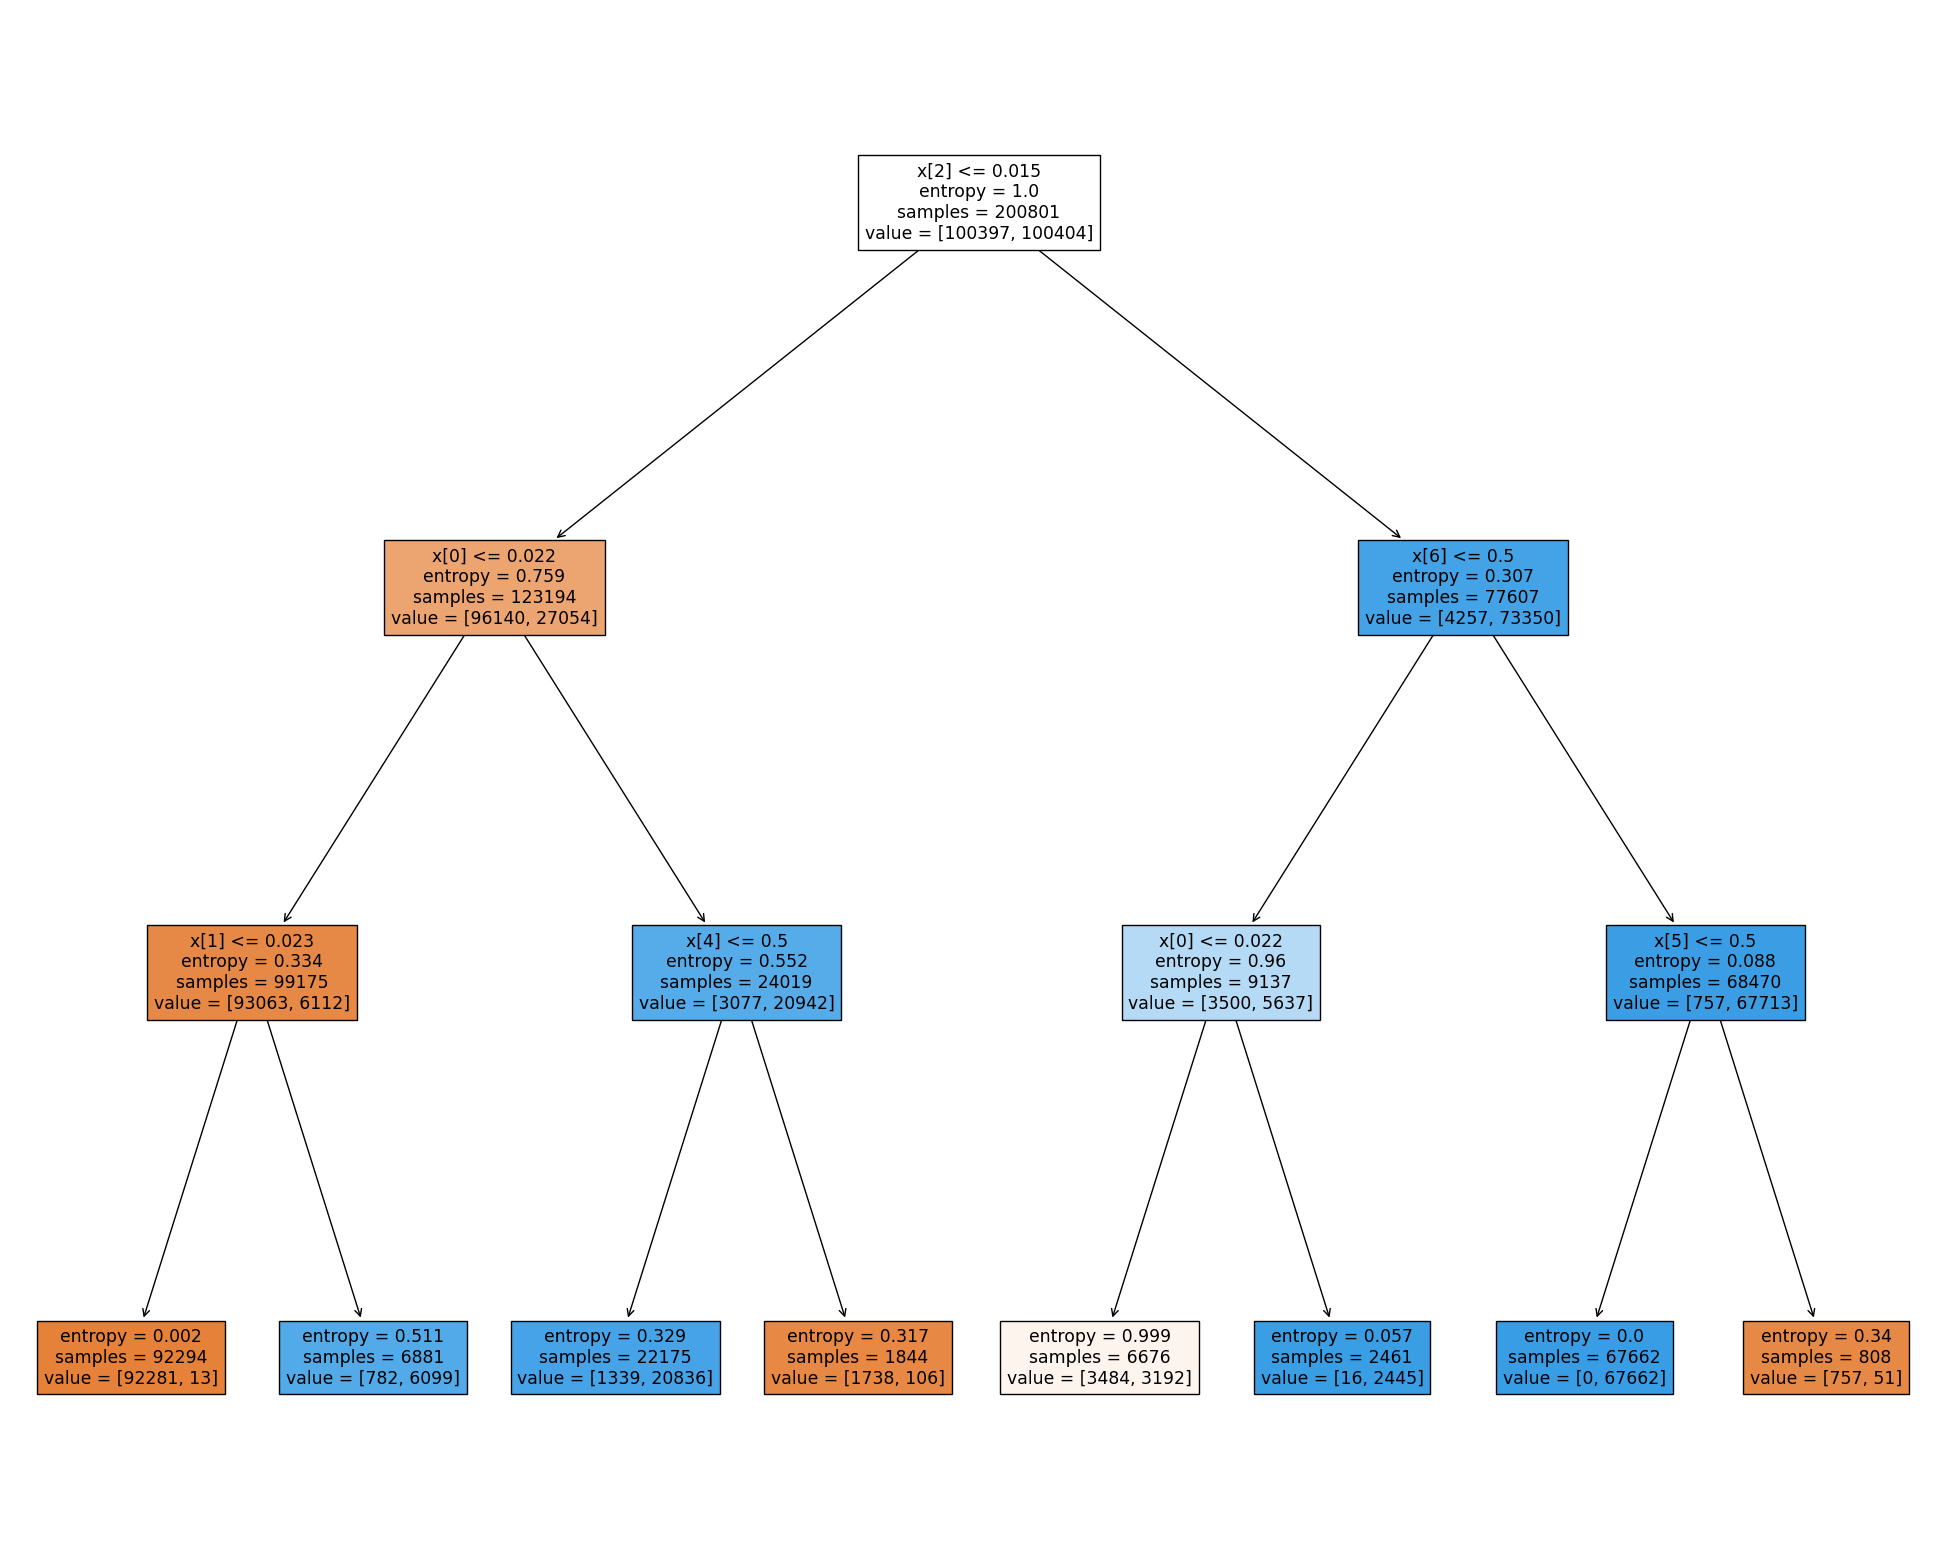

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DTC, filled=True)

In [ ]:
models_c['DecisionTreeClassifier'] = metrics_c(yc_test, yc_pred)

metrics_c(yc_test, yc_pred)   # Предсказание с помощью критерия Gini

{'Accuracy': 0.9715941913507699,
 'Precision': 0.9781826996889015,
 'Recall': 0.9646969757341515,
 'F1-score': 0.9713930348258706,
 'ROC_AUC': 0.9715932297408807}

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(yc_test, yc_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     25104
           1       0.98      0.96      0.97     25097

    accuracy                           0.97     50201
   macro avg       0.97      0.97      0.97     50201
weighted avg       0.97      0.97      0.97     50201



In [ ]:
parameters = {'criterion': ('squared_error', 'friedman_mse', 'absolute_error', 'poisson')}
optimal = GridSearchCV(DecisionTreeRegressor(max_depth=3), parameters).fit(Xr_train, yr_train)
# выводим оптимальные значения параметров
criterion = optimal.best_params_['criterion']

criterion

'squared_error'

In [ ]:
DTR = DecisionTreeRegressor(criterion=criterion, max_depth=3).fit(Xr_train, yr_train)
yr_pred = DTR.predict(Xr_test)

print(tree.export_text(DTR))

|--- feature_7 <= 6.13
|   |--- feature_0 <= 0.59
|   |   |--- feature_0 <= 0.47
|   |   |   |--- value: [772.04]
|   |   |--- feature_0 >  0.47
|   |   |   |--- value: [1652.40]
|   |--- feature_0 >  0.59
|   |   |--- feature_7 <= 5.93
|   |   |   |--- value: [2605.89]
|   |   |--- feature_7 >  5.93
|   |   |   |--- value: [3416.78]
|--- feature_7 >  6.13
|   |--- feature_7 <= 7.01
|   |   |--- feature_3 <= 2.50
|   |   |   |--- value: [4766.28]
|   |   |--- feature_3 >  2.50
|   |   |   |--- value: [6704.27]
|   |--- feature_7 >  7.01
|   |   |--- feature_7 <= 7.19
|   |   |   |--- value: [7724.66]
|   |   |--- feature_7 >  7.19
|   |   |   |--- value: [9279.69]



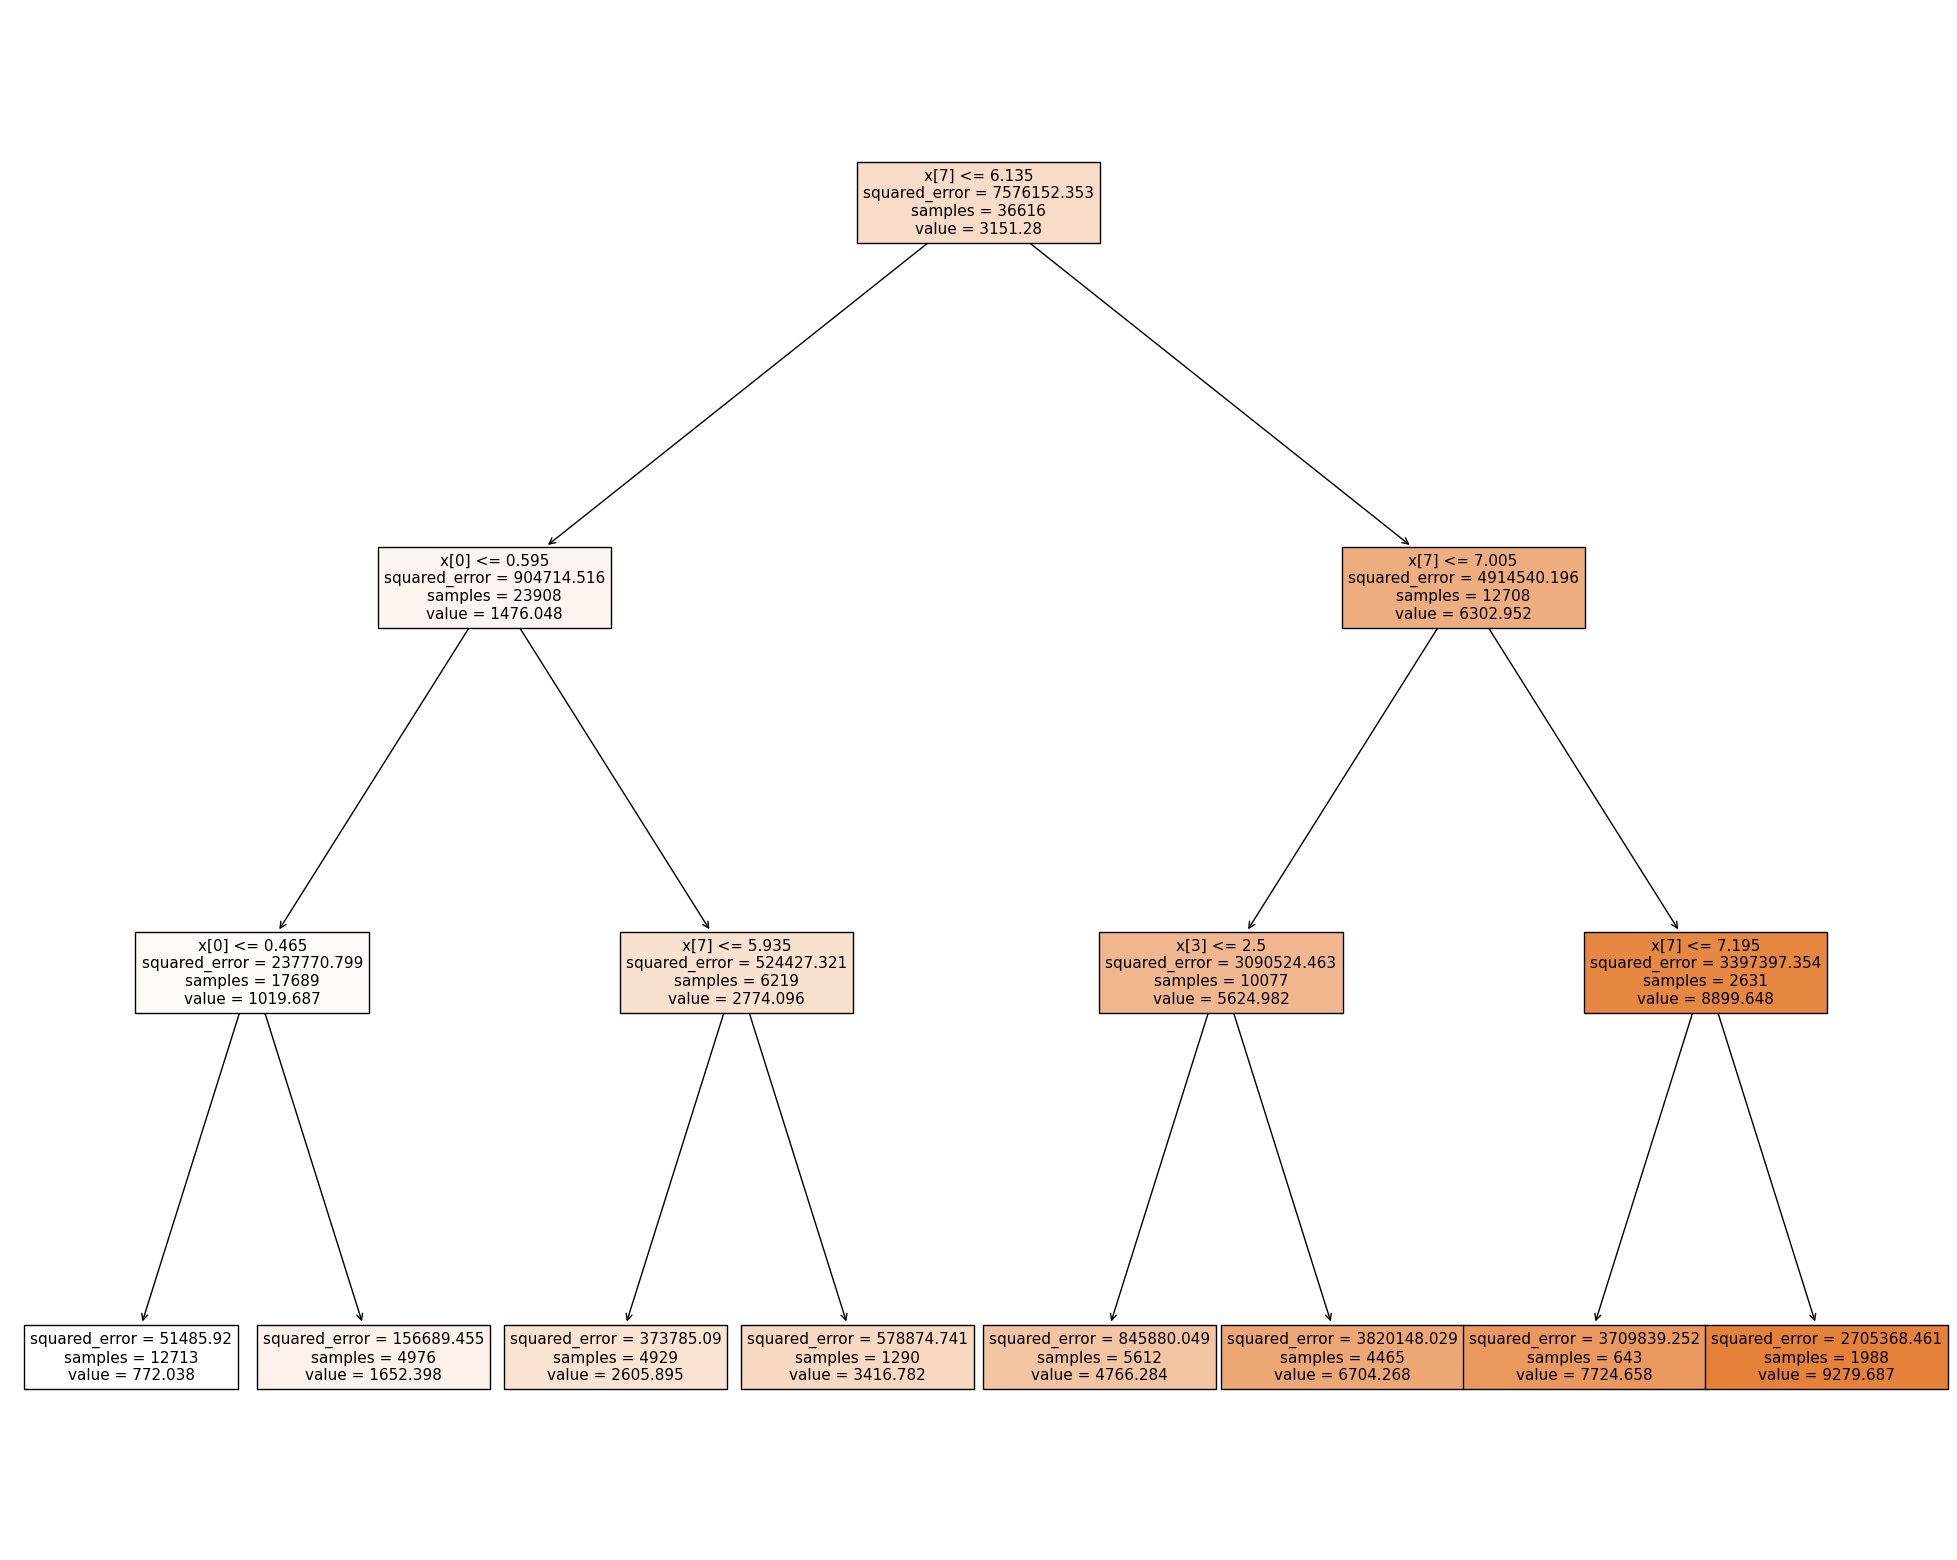

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DTR, filled=True)

In [ ]:
models_r['DecisionTreeRegressor'] = metrics_r(yr_test, yr_pred)

metrics_r(yr_test, yr_pred)

{'MAE': 589.8938928878052,
 'MSE': 928968.7727287938,
 'RMSE': 963.830261368045,
 'MAPE': 0.2214347081226699,
 'R^2': 0.8769167120246569}

## B. Реализовать обучение и вычисление дерева с использованием алгоритма CART для задачи регрессии и задачи классификации. Выполнить оценку качества моделей, визуализировать дерево решений, вывести решающие правила.

In [ ]:
from pycaret.classification import models

In [ ]:
from pycaret.regression import models

# Задание №2. Применить ансамбли для наборов данных своего варианта:

## BaggingClassifier & BaggingRegressor

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

BC = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5).fit(Xc_train, yc_train)
yc_pred = BC.predict(Xc_test)
models_c['BaggingClassifier'] = metrics_c(yc_test, yc_pred)

metrics_c(yc_test, yc_pred)

{'Accuracy': 0.9366347283918647,
 'Precision': 0.9183081386471217,
 'Recall': 0.9585209387576205,
 'F1-score': 0.9379837404714094,
 'ROC_AUC': 0.9366377797675929}

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

Poly = Pipeline([('PF', PolynomialFeatures()), ('LR', LinearRegression())]).fit(Xr_train, yr_train)
BR = BaggingRegressor(Poly).fit(Xr_train, yr_train)
yr_pred = BR.predict(Xr_test)
models_r['BaggingRegressor'] = metrics_r(yr_test, yr_pred)

metrics_r(yr_test, yr_pred)


{'MAE': 511.8836386957917,
 'MSE': 690391.2639779093,
 'RMSE': 830.8978661531809,
 'MAPE': 0.23017227725096212,
 'R^2': 0.9085269287252327}

## GradientBoostingClassifier & GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier().fit(Xc_train, yc_train)
yc_pred = GBC.predict(Xc_test)
models_c['GradientBoostingClassifier'] = metrics_c(yc_test, yc_pred)

metrics_c(yc_test, yc_pred)

{'Accuracy': 0.9968725722595168,
 'Precision': 0.9965357967667436,
 'Recall': 0.9972108220105989,
 'F1-score': 0.9968731951166079,
 'ROC_AUC': 0.9968726194183014}

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor().fit(Xr_train, yr_train)
yr_pred = GBR.predict(Xr_test)
models_r['GradientBoostingRegressor'] = metrics_r(yr_test, yr_pred)

metrics_r(yr_test, yr_pred)

{'MAE': 281.9502730209277,
 'MSE': 221356.78858321474,
 'RMSE': 470.4856943449128,
 'MAPE': 0.10953012529375654,
 'R^2': 0.9706714346549525}

## StackingClassifier & StackingRegressor

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC

estimators = [('KNC', KNeighborsClassifier()), ('LinearSVC', LinearSVC()), ('DTC', DecisionTreeClassifier(max_depth=3))]
SC = StackingClassifier(estimators=estimators).fit(Xc_train, yc_train)
yc_pred = SC.predict(Xc_test)
models_c['StackingClassifier'] = metrics_c(yc_test, yc_pred)

metrics_c(yc_test, yc_pred)

{'Accuracy': 0.9980677675743511,
 'Precision': 0.9977303496057975,
 'Recall': 0.9984061840060565,
 'F1-score': 0.9980681523968851,
 'ROC_AUC': 0.9980678147563744}

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

estimators = [('LR', LinearRegression()), ('Poly', Poly), ('DTR', DecisionTreeRegressor(max_depth=3))]
SR = StackingRegressor(estimators=estimators).fit(Xr_train, yr_train)
yr_pred = SR.predict(Xr_test)
models_r['StackingRegressor'] = metrics_r(yr_test, yr_pred)

metrics_r(yr_test, yr_pred)

{'MAE': 482.6220361535499,
 'MSE': 638945.7379816084,
 'RMSE': 799.3408146601851,
 'MAPE': 0.2089228946104956,
 'R^2': 0.9153431799030258}

## Выполнить оценку качества моделей и выбрать лучшую модель.

In [ ]:
from pprint import pprint

pprint(models_c)

best_model(models_c, 'Accuracy')

{'BaggingClassifier': {'Accuracy': 0.9366347283918647,
                       'F1-score': 0.9379837404714094,
                       'Precision': 0.9183081386471217,
                       'ROC_AUC': 0.9366377797675929,
                       'Recall': 0.9585209387576205},
 'DecisionTreeClassifier': {'Accuracy': 0.9715941913507699,
                            'F1-score': 0.9713930348258706,
                            'Precision': 0.9781826996889015,
                            'ROC_AUC': 0.9715932297408807,
                            'Recall': 0.9646969757341515},
 'GradientBoostingClassifier': {'Accuracy': 0.9968725722595168,
                                'F1-score': 0.9968731951166079,
                                'Precision': 0.9965357967667436,
                                'ROC_AUC': 0.9968726194183014,
                                'Recall': 0.9972108220105989},
 'StackingClassifier': {'Accuracy': 0.9980677675743511,
                        'F1-score': 0.99806815239688

(0.9980677675743511, 'StackingClassifier')

In [ ]:
pprint(models_r)

best_model(models_r, 'R^2')

{'BaggingRegressor': {'MAE': 511.8836386957917,
                      'MAPE': 0.23017227725096212,
                      'MSE': 690391.2639779093,
                      'RMSE': 830.8978661531809,
                      'R^2': 0.9085269287252327},
 'DecisionTreeRegressor': {'MAE': 589.8938928878052,
                           'MAPE': 0.2214347081226699,
                           'MSE': 928968.7727287938,
                           'RMSE': 963.830261368045,
                           'R^2': 0.8769167120246569},
 'GradientBoostingRegressor': {'MAE': 281.9502730209277,
                               'MAPE': 0.10953012529375654,
                               'MSE': 221356.78858321474,
                               'RMSE': 470.4856943449128,
                               'R^2': 0.9706714346549525},
 'StackingRegressor': {'MAE': 482.6220361535499,
                       'MAPE': 0.2089228946104956,
                       'MSE': 638945.7379816084,
                       'RMSE': 799.340814660

(0.9706714346549525, 'GradientBoostingRegressor')

In [ ]:
models_c = {}
models_r = {}

# Задание №3. Реализовать для решения задачи регрессии и задачи классификации следующие библиотеки:

## Catboost

In [ ]:
from catboost import CatBoostClassifier

CBC = CatBoostClassifier().fit(Xc_train, yc_train)
yc_pred = CBC.predict(Xc_test)
models_c['CatBoostClassifier'] = metrics_c(yc_test, yc_pred)

metrics_c(yc_test, yc_pred)

Learning rate set to 0.099132
0:	learn: 0.3888418	total: 93.6ms	remaining: 1m 33s
1:	learn: 0.2588431	total: 132ms	remaining: 1m 5s
2:	learn: 0.1671206	total: 170ms	remaining: 56.6s
3:	learn: 0.1161706	total: 216ms	remaining: 53.8s
4:	learn: 0.0795839	total: 257ms	remaining: 51.2s
5:	learn: 0.0609932	total: 318ms	remaining: 52.7s
6:	learn: 0.0434572	total: 356ms	remaining: 50.5s
7:	learn: 0.0352778	total: 400ms	remaining: 49.6s
8:	learn: 0.0283573	total: 444ms	remaining: 48.9s
9:	learn: 0.0232021	total: 480ms	remaining: 47.5s
10:	learn: 0.0186066	total: 516ms	remaining: 46.4s
11:	learn: 0.0162650	total: 553ms	remaining: 45.5s
12:	learn: 0.0150485	total: 590ms	remaining: 44.8s
13:	learn: 0.0136919	total: 627ms	remaining: 44.2s
14:	learn: 0.0128747	total: 667ms	remaining: 43.8s
15:	learn: 0.0121666	total: 714ms	remaining: 43.9s
16:	learn: 0.0116363	total: 745ms	remaining: 43.1s
17:	learn: 0.0110278	total: 790ms	remaining: 43.1s
18:	learn: 0.0101655	total: 856ms	remaining: 44.2s
19:	learn

{'Accuracy': 0.9975299296826756,
 'Precision': 0.9974899398382405,
 'Recall': 0.9975694306092362,
 'F1-score': 0.9975296836401307,
 'ROC_AUC': 0.9975299351898954}

In [ ]:
from catboost import CatBoostRegressor

CBR = CatBoostRegressor().fit(Xr_train, yr_train)
yr_pred = CBR.predict(Xr_test)
models_r['CatBoostRegressor'] = metrics_r(yr_test, yr_pred)

metrics_r(yr_test, yr_pred)

Learning rate set to 0.072317
0:	learn: 2578.5882750	total: 8.57ms	remaining: 8.56s
1:	learn: 2418.5547244	total: 15.8ms	remaining: 7.89s
2:	learn: 2268.1573156	total: 24.7ms	remaining: 8.22s
3:	learn: 2134.4907098	total: 31.5ms	remaining: 7.84s
4:	learn: 2009.5461391	total: 38.2ms	remaining: 7.6s
5:	learn: 1895.9021427	total: 45.1ms	remaining: 7.48s
6:	learn: 1789.8827831	total: 51.7ms	remaining: 7.33s
7:	learn: 1690.3170359	total: 58.2ms	remaining: 7.22s
8:	learn: 1597.2664364	total: 65.1ms	remaining: 7.17s
9:	learn: 1510.4807685	total: 71.9ms	remaining: 7.12s
10:	learn: 1430.3998326	total: 79.7ms	remaining: 7.16s
11:	learn: 1355.8260224	total: 86.6ms	remaining: 7.13s
12:	learn: 1289.1471282	total: 93ms	remaining: 7.06s
13:	learn: 1226.8980403	total: 99.9ms	remaining: 7.04s
14:	learn: 1171.0322845	total: 106ms	remaining: 6.99s
15:	learn: 1116.1878648	total: 113ms	remaining: 6.94s
16:	learn: 1065.7344252	total: 120ms	remaining: 6.92s
17:	learn: 1019.9765200	total: 126ms	remaining: 6.9

{'MAE': 206.02428342837987,
 'MSE': 127907.34291983831,
 'RMSE': 357.6413607510159,
 'MAPE': 0.07026727142121178,
 'R^2': 0.9830529757458709}

## XGBoost

In [ ]:
from xgboost import XGBClassifier

XGBC = XGBClassifier().fit(Xc_train, yc_train)
yc_pred = XGBC.predict(Xc_test)
models_c['XGBClassifier'] = metrics_c(yc_test, yc_pred)

metrics_c(yc_test, yc_pred)

{'Accuracy': 0.9981275273400928,
 'Precision': 0.9979685321649074,
 'Recall': 0.9982866478065108,
 'F1-score': 0.998127564638859,
 'ROC_AUC': 0.9981275495246703}

In [ ]:
from xgboost import XGBRegressor

XGBR = XGBRegressor().fit(Xr_train, yr_train)
yr_pred = XGBR.predict(Xr_test)
models_r['XGBRegressor'] = metrics_r(yr_test, yr_pred)

metrics_r(yr_test, yr_pred)

{'MAE': 209.4220798494515,
 'MSE': 135261.56594476211,
 'RMSE': 367.77923533658355,
 'MAPE': 0.06845421084353105,
 'R^2': 0.9820785813668729}

## LightGBM

In [ ]:
import lightgbm as lgb

LGBC = lgb.LGBMClassifier().fit(Xc_train, yc_train)
yc_pred = LGBC.predict(Xc_test)
models_c['LGBClassifier'] = metrics_c(yc_test, yc_pred)

metrics_c(yc_test, yc_pred)

[LightGBM] [Info] Number of positive: 100404, number of negative: 100397
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 200801, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500017 -> initscore=0.000070
[LightGBM] [Info] Start training from score 0.000070


{'Accuracy': 0.9977689687456425,
 'Precision': 0.9975307658608467,
 'Recall': 0.9980077300075706,
 'F1-score': 0.9977691909333546,
 'ROC_AUC': 0.9977690020337409}

In [ ]:
LGBR = lgb.LGBMRegressor().fit(Xr_train, yr_train)
yr_pred = LGBR.predict(Xr_test)
models_r['LGBRegressor'] = metrics_r(yr_test, yr_pred)

metrics_r(yr_test, yr_pred)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1097
[LightGBM] [Info] Number of data points in the train set: 36616, number of used features: 9
[LightGBM] [Info] Start training from score 3151.280014


{'MAE': 211.45258126086716,
 'MSE': 128166.39976726347,
 'RMSE': 358.00335161456724,
 'MAPE': 0.07630196299613957,
 'R^2': 0.9830186521286626}

## Выполнить оценку качества моделей и выбрать лучшую модель.

In [ ]:
pprint(models_c)

best_model(models_c, 'Accuracy')

{'CatBoostClassifier': {'Accuracy': 0.9975299296826756,
                        'F1-score': 0.9975296836401307,
                        'Precision': 0.9974899398382405,
                        'ROC_AUC': 0.9975299351898954,
                        'Recall': 0.9975694306092362},
 'LGBClassifier': {'Accuracy': 0.9977689687456425,
                   'F1-score': 0.9977691909333546,
                   'Precision': 0.9975307658608467,
                   'ROC_AUC': 0.9977690020337409,
                   'Recall': 0.9980077300075706},
 'XGBClassifier': {'Accuracy': 0.9981275273400928,
                   'F1-score': 0.998127564638859,
                   'Precision': 0.9979685321649074,
                   'ROC_AUC': 0.9981275495246703,
                   'Recall': 0.9982866478065108}}


(0.9981275273400928, 'XGBClassifier')

In [ ]:
pprint(models_r)

best_model(models_r, 'R^2')

{'CatBoostRegressor': {'MAE': 206.02428342837987,
                       'MAPE': 0.07026727142121178,
                       'MSE': 127907.34291983831,
                       'RMSE': 357.6413607510159,
                       'R^2': 0.9830529757458709},
 'LGBRegressor': {'MAE': 211.45258126086716,
                  'MAPE': 0.07630196299613957,
                  'MSE': 128166.39976726347,
                  'RMSE': 358.00335161456724,
                  'R^2': 0.9830186521286626},
 'XGBRegressor': {'MAE': 209.4220798494515,
                  'MAPE': 0.06845421084353105,
                  'MSE': 135261.56594476211,
                  'RMSE': 367.77923533658355,
                  'R^2': 0.9820785813668729}}


(0.9830529757458709, 'CatBoostRegressor')